In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('clean_players_data.csv', index_col=0)
df.head()

,Player_Name,Age,Position,Market_Value,Salary,Overall_Rating,Potential,Crossing,Finishing,Heading Accuracy,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
1,christian makoun,22,CDM,1800000.0,2000.0,66,76,58,38,58,...,63,64.0,66.0,66.0,64.0,6.0,13.0,14.0,6.0,10.0
2,nico gorzel,24,CM,575000.0,850.0,62,66,52,39,48,...,35,64.0,59.0,58.0,56.0,13.0,12.0,10.0,15.0,12.0
3,femi seriki,20,WB,750000.0,3000.0,61,75,53,25,49,...,34,51.0,44.0,58.0,58.0,9.0,10.0,14.0,11.0,9.0
5,dario maresic,23,CB,2300000.0,7000.0,68,75,44,26,62,...,35,72.0,72.0,73.0,71.0,14.0,11.0,15.0,11.0,7.0
6,rufino lucero,20,WB,1300000.0,2000.0,64,76,62,27,46,...,42,45.0,57.0,62.0,66.0,9.0,10.0,13.0,6.0,14.0


## Global Preprocessing

In [ ]:
X = df.copy()
Y = X.pop('Market_Value')

In [ ]:
df.columns

Index(['Player_Name', 'Age', 'Position', 'Market_Value', 'Salary',
       'Overall_Rating', 'Potential', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defensive Awareness', 'Standing Tackle', 'Sliding Tackle', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [ ]:
col_to_drop = ['Player_Name']

X.drop(columns=col_to_drop, inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
num_var = [c for c in X.select_dtypes(np.number)]
cat_var = [c for c in X.select_dtypes('object')]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')
)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_var),
        ('cat', cat_transformer, cat_var)
    
])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Part I - Predict player's market value 💸

### Model Selection

In [ ]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()

In [ ]:
pip install xgboost

     |████████████████████████████████| 193.6 MB 38 kB/s              
Note: you may need to restart the kernel to use updated packages.


In [ ]:
xgb = XGBRegressor()

In [ ]:
cross_val_lr = cross_val_score(lr, X_train, Y_train, cv=3)
cross_val_rf = cross_val_score(rf, X_train, Y_train, cv=3)
#cross_val_svr = cross_val_score(svr, X_train, Y_train, cv=3)
cross_val_xgb = cross_val_score(xgb, X_train, Y_train, cv=3)


print(f"Cross val score Linear Regression: {cross_val_lr.mean()}")
print(f"Cross val score Random Forrest: {cross_val_rf.mean()}")
#print(f"Cross val score SVR: {cross_val_svr.mean()}")
print(f"Cross val score XGBoost: {cross_val_xgb.mean()}")

Cross val score Linear Regression: 0.7208233784907416
Cross val score Random Forrest: 0.9465928804175742
Cross val score XGBoost: 0.9714940673890475


In [ ]:
lr.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Hyperparamétrisation

In [ ]:
from sklearn.model_selection import GridSearchCV

params_rf = {
    'n_estimators': [100,300,500],
    'min_samples_leaf':[8,16,32],
    #'min_samples_split':[8,16,32]
}

params_xgb = {
    'n_estimators':[100,300,500],
    'learning_rate': [0.1,0.2,0.3,0.5,1],
    'max_depths': [4,8,16]
}

In [ ]:
#grid_rf = GridSearchCV(rf, params_rf, cv=5, verbose=3)

In [ ]:
#grid_rf.fit(X_train, Y_train)

In [ ]:
#grid_rf.best_params_

In [ ]:
#grid_xgb = GridSearchCV(xgb, params_xgb, cv=5, verbose=3)

In [ ]:
#grid_xgb.fit(X_train, Y_train)

In [ ]:
#grid_xgb.best_score_

In [ ]:
#grid_xgb.best_params_

In [ ]:
best_xgb = XGBRegressor(n_estimators = 500, 
                        learning_rate = 0.3, 
                        max_depths = 4)

### Model Performances

In [ ]:
best_xgb.fit(X_train, Y_train)
best_xgb.score(X_test, Y_test)

[13:19:09] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depths" } are not used.



0.9781309466629777

In [ ]:
rmse_rf = np.sqrt(mean_squared_error(Y_test, rf.predict(X_test)))
rmse_lr = np.sqrt(mean_squared_error(Y_test, lr.predict(X_test)))
rmse_best_xgb = np.sqrt(mean_squared_error(Y_test, best_xgb.predict(X_test)))

In [ ]:
print(f"Erreur commise avec Linear Regression: {round(rmse_lr,2)}")
print(f"Erreur commise avec Random forrest: {round(rmse_rf,2)}")
print(f"Erreur commise avec Best XGB: {round(rmse_best_xgb,2)}")

Erreur commise avec Random forrest: 1794231.13
Erreur commise avec XGB: 1328759.01
Erreur commise avec Linear Regression: 4724034.57
Erreur commise avec Best XGB: 1329392.67


We can actually observe that RMSE wise, our XGBoost algorithm outperformed the two other ones we tested.

In [ ]:
predictions_comparison = pd.DataFrame()

predictions_comparison['True Value'] = Y_test
predictions_comparison['Random Forrest Predictions'] = rf.predict(X_test)
predictions_comparison['XGB Predictions'] = xgb.predict(X_test)

In [ ]:
predictions_comparison[predictions_comparison['True Value'] > 30000000]

,True Value,Random Forrest Predictions,XGB Predictions
11408,37000000.0,42850000.0,44841180.0
14729,98500000.0,80625000.0,87486944.0
2050,39000000.0,37860000.0,36491480.0
17264,52500000.0,47740000.0,51063056.0
9405,56500000.0,53905000.0,63474748.0
...,...,...,...
1358,38500000.0,41565000.0,38670508.0
7515,37000000.0,35805000.0,38514536.0
3724,46000000.0,40625000.0,41269220.0
13727,47500000.0,43920000.0,40843396.0


## Part II - Clustering of the players per position ⚽️

In [ ]:
df = pd.read_csv('clean_players_data.csv')

In [ ]:
datasets = []
positions = []

for i in list(df['Position'].unique()):
    
    new_df = df[df['Position'] == i]
    
    datasets.append(new_df)
    positions.append(i)
    

In [ ]:
df_kmeans = df.drop(columns=['Player_Name', 'Overall_Rating','Potential','Market_Value','Salary','Position'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
cat_var = [c for c in df_kmeans.columns if df_kmeans.dtypes[c] == 'object']
num_var = [c for c in df_kmeans.columns if df_kmeans.dtypes[c] == np.number]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore')
)])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_var),
        ('cat', cat_transformer, cat_var)
    
])

/tmp/ipykernel_49/548634211.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  num_var = [c for c in df_kmeans.columns if df_kmeans.dtypes[c] == np.number]


In [ ]:
transform_df = []

for d in datasets:
    d = preprocessor.fit_transform(d)
    transform_df.append(d)

In [ ]:
inertias = []
for j in range(len(transform_df)):
    
    print(f"Dataset {positions[j]}")
    k = []
    wcss = []
    
    for i in range(1,20):

        kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++')
        kmeans.fit(transform_df[j])

        k.append(i)
        wcss.append(kmeans.inertia_)

        print(f"For k={k[i-1]}, WCSS --> {wcss[i-1]} ")
    
    print('----------------------------------------')
    print('\n')
    
    inertias.append(wcss)

Dataset CDM
For k=1, WCSS --> 8280.0 
For k=2, WCSS --> 6349.601103237388 
For k=3, WCSS --> 5439.9973065389995 
For k=4, WCSS --> 4961.459361702496 
For k=5, WCSS --> 4654.992228694073 
For k=6, WCSS --> 4397.900144325961 
For k=7, WCSS --> 4174.404540664138 
For k=8, WCSS --> 4002.69459466865 
For k=9, WCSS --> 3817.728029773977 
For k=10, WCSS --> 3621.067619033006 
For k=11, WCSS --> 3462.2435742653934 
For k=12, WCSS --> 3341.684730060426 
For k=13, WCSS --> 3242.6263207015973 
For k=14, WCSS --> 3158.1033205105578 
For k=15, WCSS --> 3078.2779280000464 
For k=16, WCSS --> 2998.446365014129 
For k=17, WCSS --> 2945.1134629773 
For k=18, WCSS --> 2864.6138686237045 
For k=19, WCSS --> 2808.620260747658 
----------------------------------------


Dataset CM
For k=1, WCSS --> 6624.0 
For k=2, WCSS --> 5150.561425554965 
For k=3, WCSS --> 4465.9068741357905 
For k=4, WCSS --> 4103.913260574833 
For k=5, WCSS --> 3843.2105354374935 
For k=6, WCSS --> 3641.238183689808 
For k=7, WCSS --

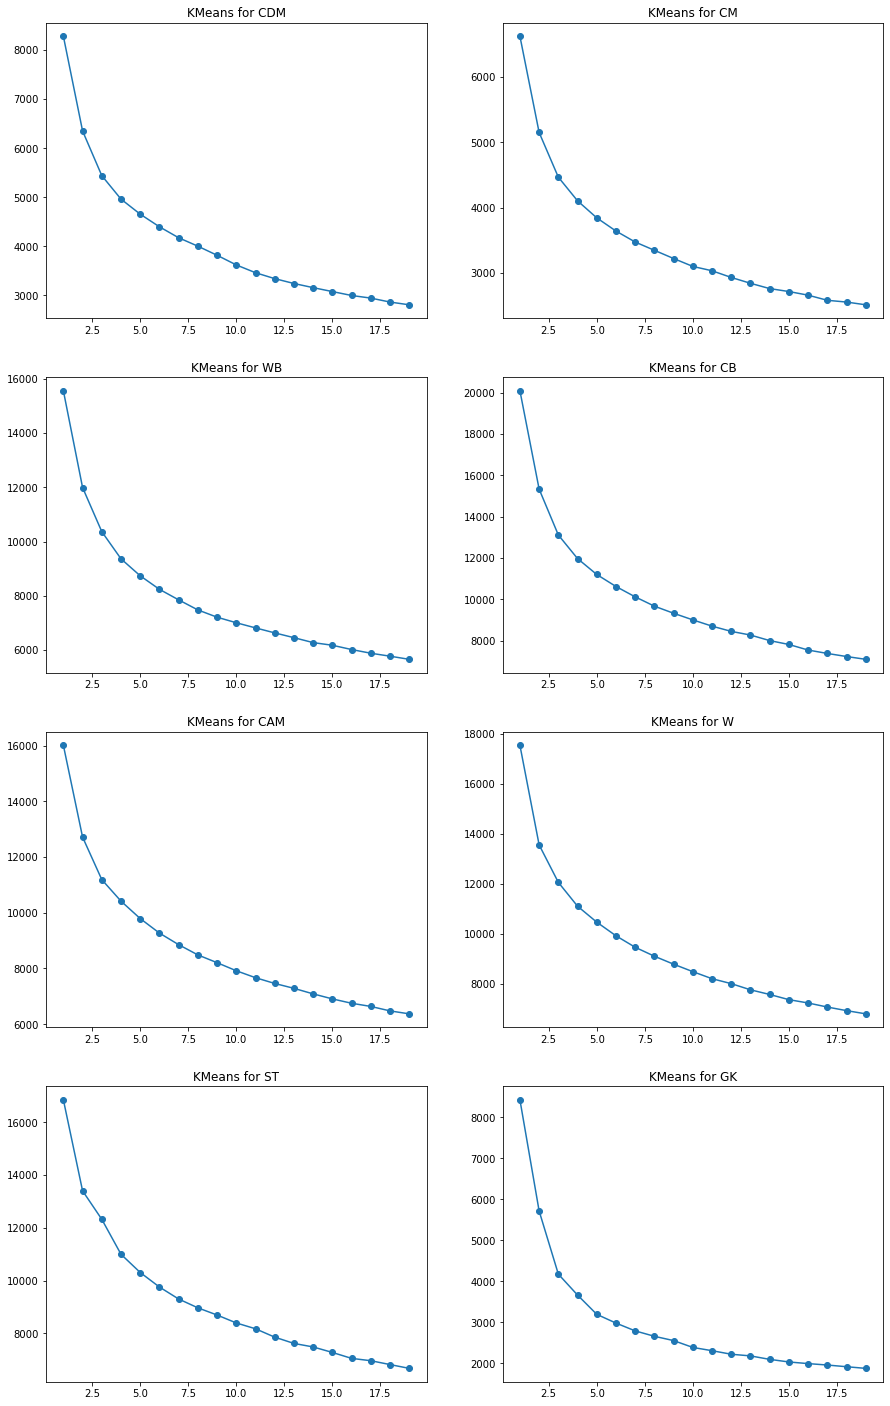

In [ ]:
plt.figure(figsize=(15,25))


for i in range(len(positions)):
    plt.subplot(4,2,i+1)    
    plt.plot(range(1,20),inertias[i], marker='o')
    plt.title(f'KMeans for {positions[i]}')

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for i in range(len(transform_df)):
    print(f'Datasets {positions[i]}')
    k = []
    sil = []
    
    for j in range(2,20):  
        kmeans = KMeans(n_clusters=j, random_state=42, init='k-means++')
        kmeans.fit(transform_df[i])
        k.append(j)
        sil.append(silhouette_score(transform_df[i], kmeans.labels_))
        
    sil_scores.append(sil)
    print('---------------------------------')
    print('\n')

Datasets CDM
---------------------------------


Datasets CM
---------------------------------


Datasets WB
---------------------------------


Datasets CB
---------------------------------


Datasets CAM
---------------------------------


Datasets W
---------------------------------


Datasets ST
---------------------------------


Datasets GK
---------------------------------




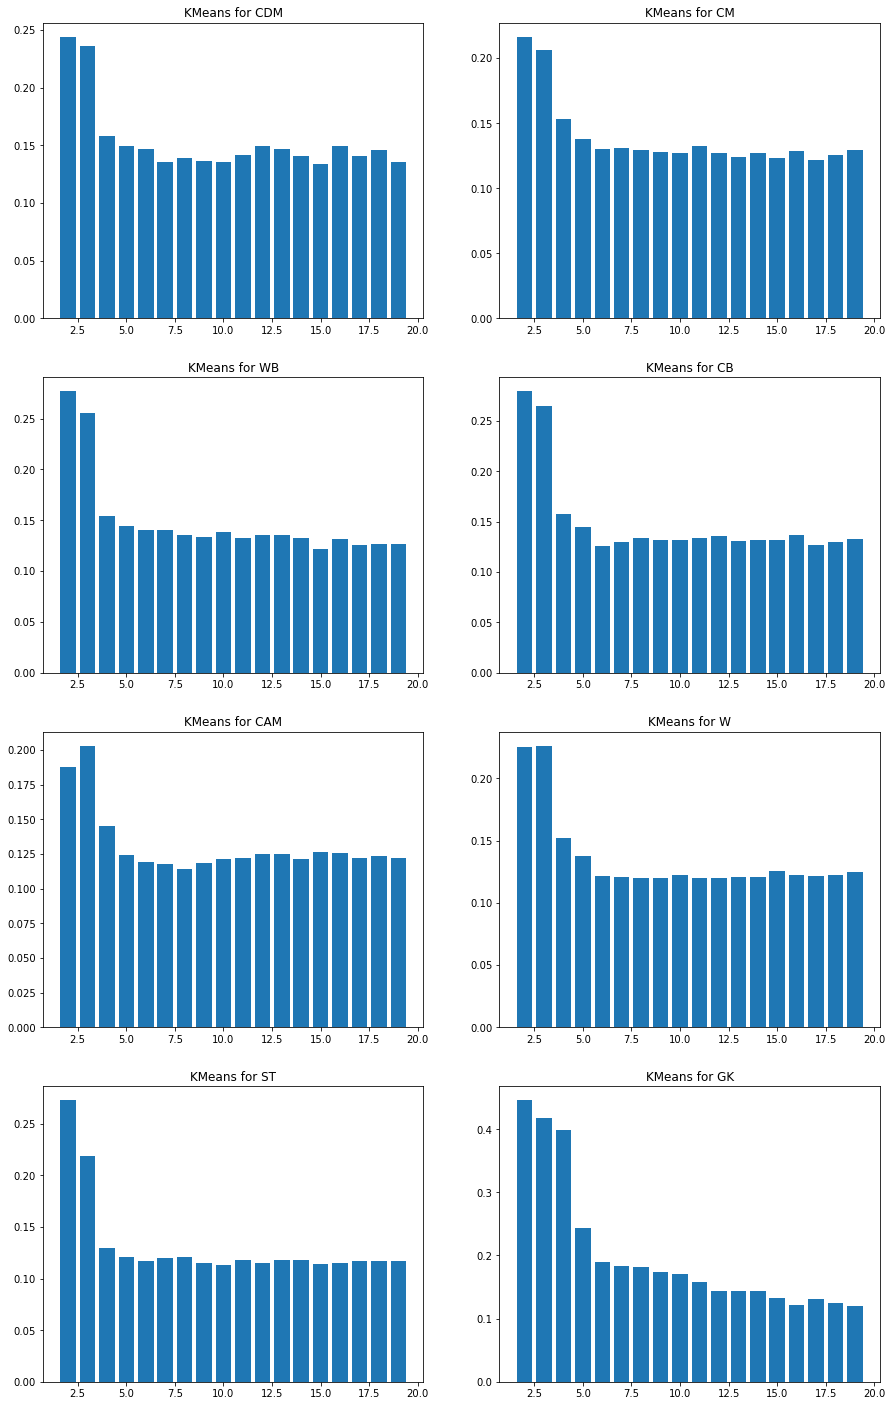

In [ ]:
plt.figure(figsize=(15,25))

for i in range(len(positions)):    
    plt.subplot(4,2,i+1)
    plt.bar(x = range(2,20),height=sil_scores[i])
    plt.title(f'KMeans for {positions[i]}')

From our silhouette and elbow curves we derived the following number of clusters per position:
- CDM : 4
- CM : 4
- WB : 5
- CB : 5
- CAM : 4
- W : 5
- ST : 4
- GK : 4

In [ ]:
clust_pos = [4,4,5,5,4,5,4,4]

In [ ]:
models = []

for i in range(8):
    kmeans = KMeans(n_clusters=clust_pos[i])
    kmeans.fit(transform_df[i])
    models.append(kmeans)

In [ ]:
clust_cent = [models[i].cluster_centers_ for i in range(8)]

In [ ]:
models[0].cluster_centers_

array([[-0.45732558, -0.54238351, -0.52611494, -0.50163122, -0.21283751,
         0.69150612,  0.11489504, -0.26971803,  0.38047872],
       [ 1.13489254,  1.00181071,  1.10810931,  0.85698045, -0.18877494,
         0.0788527 ,  0.06559909,  0.10159547,  0.06027853],
       [-0.32916218, -0.43794807, -0.51245294, -0.36887186, -0.23875465,
        -0.78170762, -0.18832395,  0.19792599, -0.46667601],
       [-0.37429865,  1.74497587,  1.57568908,  1.73369504,  4.29038957,
        -0.08782364,  0.11438571,  0.07504659,  0.11831938]])

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
pca = PCA(n_components=2)
P = []
C = []

for i in range(8):
    pca_transf = pca.fit_transform(transform_df[i])
    P.append(pca_transf)
    
    pca_cent_transf = pca.fit_transform(clust_cent[i])
    C.append(pca_cent_transf)

In [ ]:
CDM = pd.DataFrame(P[0])
CDM["cluster"] = models[0].labels_
CDM

,0,1,cluster
0,-0.065251,-0.809993,0
1,0.893313,0.455359,1
2,-1.041814,0.182533,2
3,-0.062037,1.185640,2
4,-0.526924,0.444264,2
...,...,...,...
915,-1.372636,-0.789830,0
916,-1.378647,0.394867,2
917,-1.625723,-1.080734,0
918,2.561603,0.421393,1


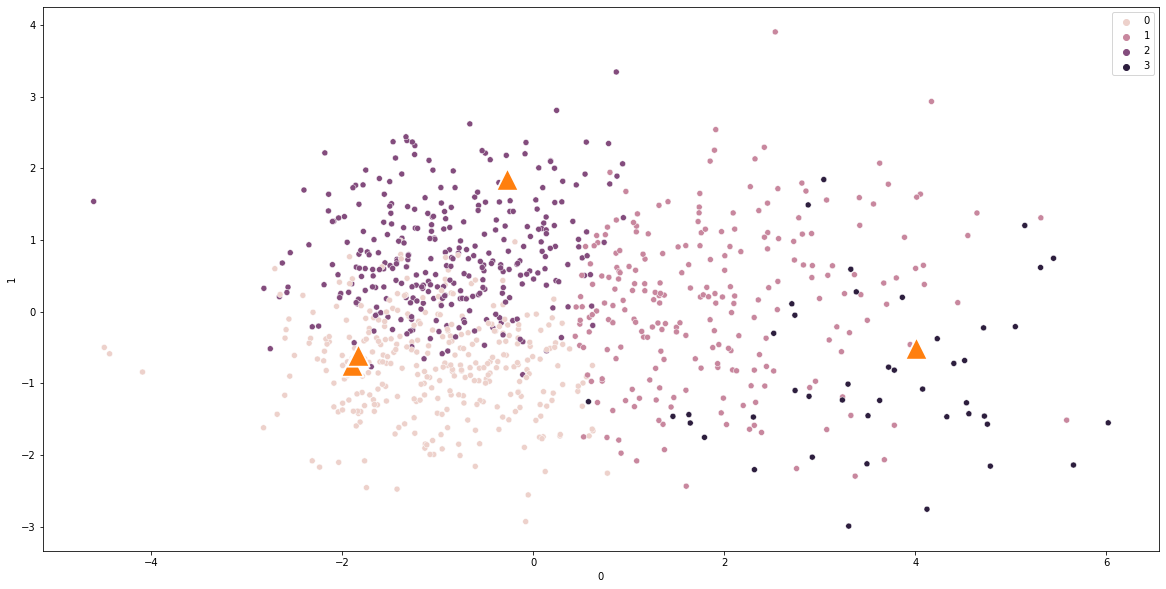

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=0,y=1,hue="cluster",data=CDM)
sns.scatterplot(x=C[0][:,0],y=C[0][:,1],marker='^',s=500);

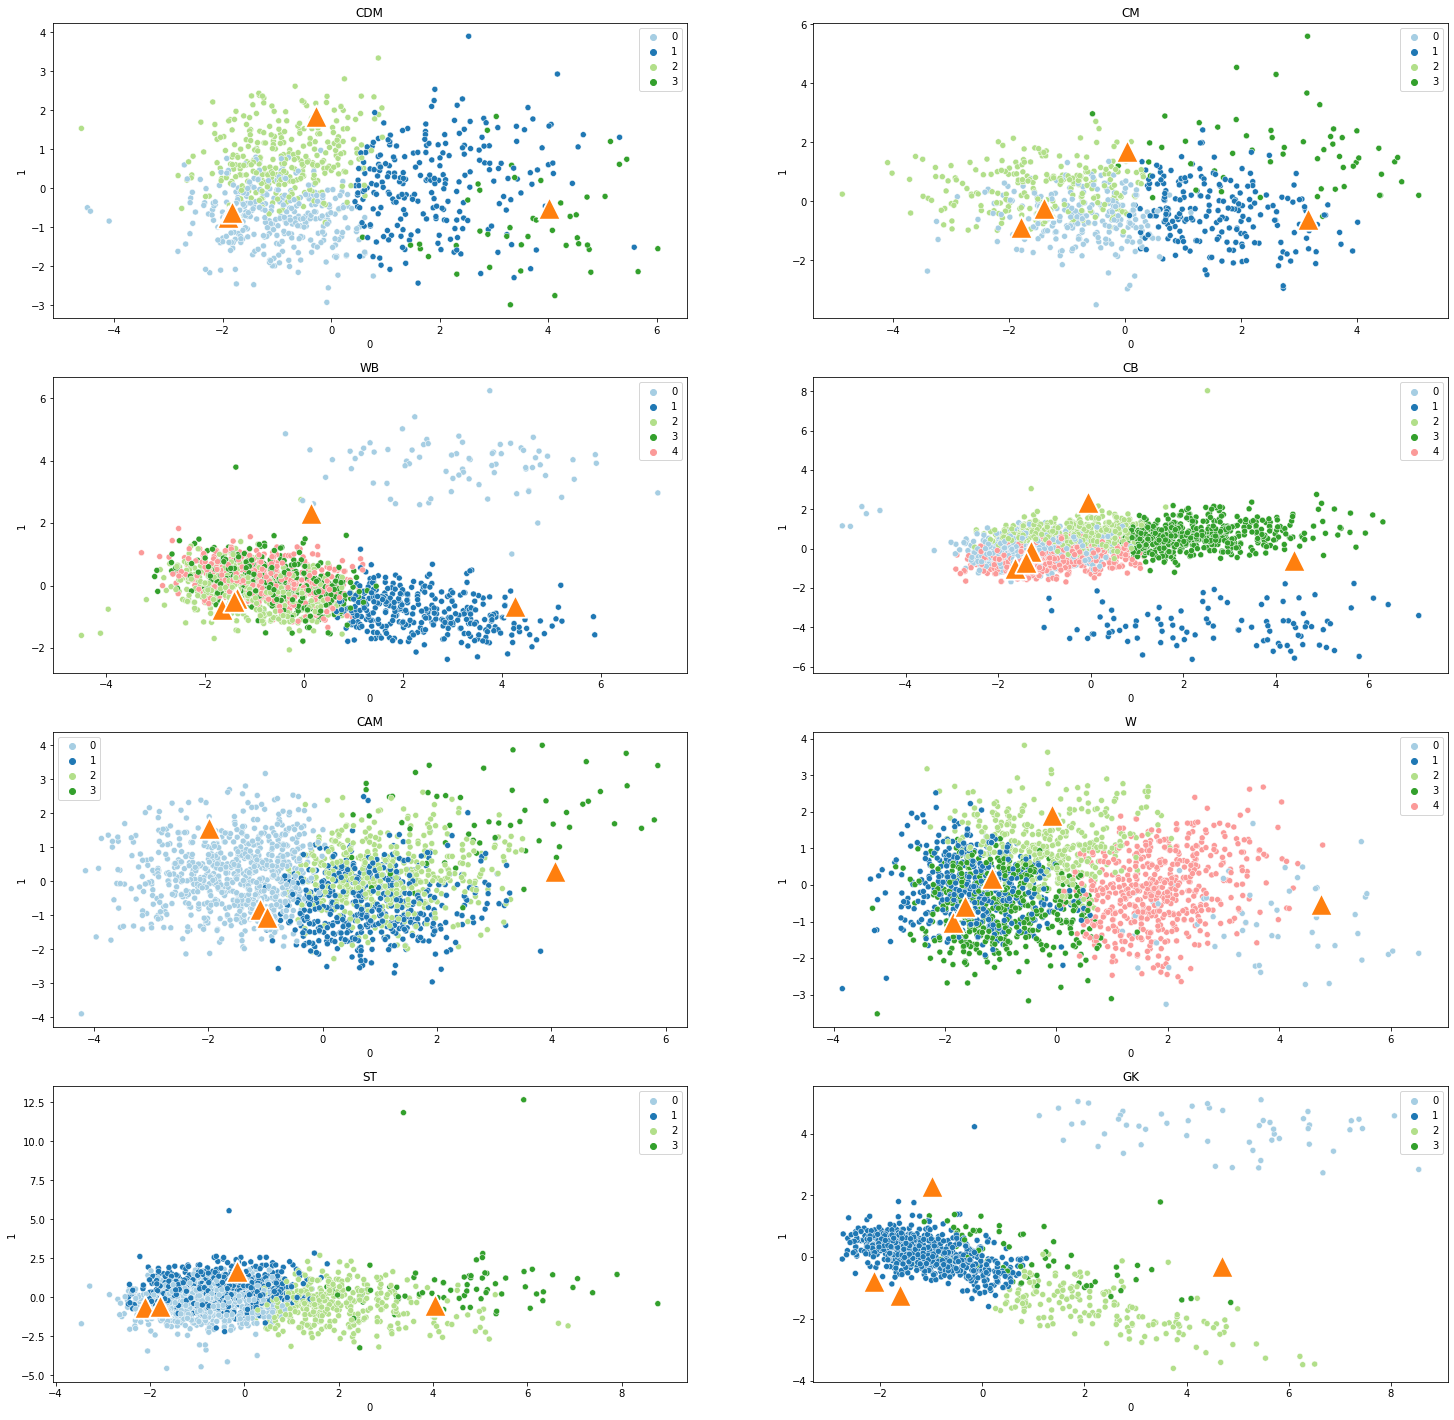

In [ ]:
plt.figure(figsize=(25,25))

for i in range(8):
    pos = pd.DataFrame(P[i])
    pos["cluster"] = models[i].labels_
    
    plt.subplot(4,2,i+1)

    sns.scatterplot(x=0,y=1,hue="cluster",data=pos,palette="Paired")
    sns.scatterplot(x=C[i][:,0],y=C[i][:,1],marker='^',s=500)
    plt.title(positions[i])

We have some particular cases here : 
- The goalkeepers (GK) are not really easy to cluster. Might be due to the fact that there is one #1 per team and many GKs that are mainly substitutes, so their levels can be altered throughout the years as they don't have that much chances to perform.
- The CMs are widely spread and their centroids are far from each other because of the various roles a CM can have in a team (*Exple* : 6,8 and 10)